# What we're covering in the Scikit-Learn Introduction
This notebook outlines the content convered in the Scikit-Learn Introduction.

It's a quick stop to see all the Scikit-Learn functions and modules for each section outlined.

What we're covering follows the following diagram detailing a Scikit-Learn workflow.

## 0. An end-to-end Scikit-learn workflow

In [7]:
import numpy as np

In [8]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Create X (feature matices)
X = heart_disease.drop("target",axis=1)

# Create Y (target)
y = heart_disease["target"]

In [10]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the defualt hyperparameters
#clf.get_params()

In [11]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [12]:
clf.fit(X_train,y_train);

In [13]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [14]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)

1.0

In [15]:
clf.score(X_test,y_test)

0.9016393442622951

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        29
           1       0.84      1.00      0.91        32

    accuracy                           0.90        61
   macro avg       0.92      0.90      0.90        61
weighted avg       0.92      0.90      0.90        61



In [17]:
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 0, 32]])

In [18]:
accuracy_score(y_test,y_preds)

0.9016393442622951

In [19]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(end=f"Try model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(X_train,y_train)
    print(f"The accuracy on test set is {clf.score(X_test,y_test)*100:.2f}%")
    

Try model with 10 estimators...The accuracy on test set is 77.05%
Try model with 20 estimators...The accuracy on test set is 86.89%
Try model with 30 estimators...The accuracy on test set is 90.16%
Try model with 40 estimators...The accuracy on test set is 88.52%
Try model with 50 estimators...The accuracy on test set is 86.89%
Try model with 60 estimators...The accuracy on test set is 90.16%
Try model with 70 estimators...The accuracy on test set is 86.89%
Try model with 80 estimators...The accuracy on test set is 86.89%
Try model with 90 estimators...The accuracy on test set is 91.80%


In [20]:
# 6. Save the model and load it
import pickle

pickle.dump(clf,open("Outputs/random_forest_model_1.pkl","wb"))

In [21]:
loaded_model = pickle.load(open("Outputs/random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.9180327868852459

## 1. Getting our data ready to be used with machine learning

Three main things that we have to do:

    1. Split the data into features and labels (Usually 'X' and 'y')
    2. Filling (also call imputing) or disregarding missing value
    3. Converting non-numerical value to numerical value (also call feature encoding)
    

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop("target",axis=1)

In [24]:
y = heart_disease["target"]

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## 1.1 Make sure it's all numerical

In [28]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Split the data
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
# Build machine learning
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = RandomForestRegressor()

In [34]:
#model.fit(X_train,y_train)

In [35]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [36]:
# Turn catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# Refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size = 0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
model.score(X_test,y_test)

0.3235867221569877

### What if there were missing values?

1. Fill them with some value (also known as imoutation).
2. Remove the sample with missing data altogether.

In [41]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [44]:
# Create X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

### Option 1: Fill the data with pandas

In [45]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colur" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [46]:
# Check our DataFrame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove row with missing car price
car_sales_missing.dropna(inplace=True)

In [48]:
# Create X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [49]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [50]:
# Let's try and convert the data to numbers
# Turn catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [51]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing value with Scikit-Learn

In [52]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Drop the row with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [56]:
# Split into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [57]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [58]:
# Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Defined columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create imputer (something that fill the missing data)
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_feature)])

# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

In [59]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Let's try and convert the data to numbers
# Turn catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)


# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [61]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimators as another term for machine learning model or algorithm.

* Classification - predicting wether a sample is a ont thing or another.
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [62]:
# Import Boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()

In [63]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [64]:
# How many sample?
len(boston_df)

506

In [65]:
# Let's try the Ridge regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the train test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train,y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

0.6662221670168519

In [66]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the train test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

# check the score of the Random Forest Regressor on test data
rf.score(X_test,y_test)

0.8654448653350507

### 2.2 Picking a machine learning model for a classification problem

In [67]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Consulting the map and it says try 'LinearSVC'.

In [68]:
# Import the LinearSVC
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = LinearSVC(max_iter=1000)
model.fit(X_train,y_train)

# Check the score from LinearSVC on the test dataset
model.score(X_test,y_test)

/Users/wine/Desktop/Learn/sample/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

Tidbid:

    1. If you have structured data, used ensemble model
    2. If you have unstructured data, used deep learning or transfer learning

In [69]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()
model.fit(X_train,y_train)

# Check the score from LinearSVC on the test dataset
model.score(X_test,y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different name for:
* `X` = features, features variable, data, input
* `y` = labels, target variables, outputs

In [70]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
model.fit(X_train,y_train)

# Check the score from LinearSVC on the test dataset (use the pattern the model has)
model.score(X_test,y_test)

0.8524590163934426

### 3.2 Make prediction using the machine learning model

2 ways to make a prediction
1. `predict()`
2. `predict_proba()`

In [71]:
# Use a trained model to make a predictions
#model.predict(np.array([1,7,8,3,4])) # This doesn't work

In [72]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [73]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [75]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [76]:
model.score(X_test,y_test)

0.8524590163934426

In [77]:
from sklearn.metrics import accuracy_score

accuracy_score(y_preds,y_test)

0.8524590163934426

In [78]:
# Make a prediction with predict_proba(), return prababilities of a classification label
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [79]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can be used for regression model

In [80]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators =100)
model.fit(X_train,y_train)

y_preds = model.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [81]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [82]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_preds,y_test)

2.136382352941176

## 4. Evaluating a machine learning model

Three ways to evaluate the Scikit-Learn model/estimators:
1. Estimators score method.
2. The scoring parameter.
3. Problem-specific metrics functions.

### 4.1 Evaluating a model with score method

In [83]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [84]:
clf.score(X_test,y_test)

0.8524590163934426

Let's do the same but for regression

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [86]:
model.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model with scoring parametors

In [87]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [88]:
clf.score(X_test,y_test)

0.8524590163934426

In [89]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [90]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [91]:
np.random.seed(42)

# Single training and test split
clf_single_score = clf.score(X_test,y_test)

# Take mean of 5-folds cross-validiation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare two scores
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [92]:
# Defualt scoring parameter of classifier = mean accuracy
# Scoring parameter set to None by defualt

cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [94]:
np.mean(cross_val_score)

0.8215300546448088

In [95]:
print(f"Heart disease classifier accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart disease classifier accuracy: 82.15%


**Area under reciever operating characteristic curve (AUC/ROC)**
* Area under curve(AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)
* True positive = model predicts 1 when the truth is 1
* False positive = model predicts 1 when the truth is 0
* True negative = model predicts 0 when the truth is 0
* False negative = model predicts 0 when the truth is 0

In [96]:
# Create X_test .... etc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [97]:
from sklearn.metrics import roc_curve

# Fit the model
clf.fit(X_train,y_train)

# Make a prediction with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [98]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01])

In [99]:
# Calculate fpr,tpr,tresholds
fpr,tpr,tresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

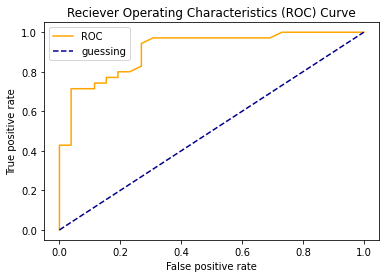

In [100]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_ROC_curve(fpr,tpr):
    """
    Plot the ROC curve given false positive rate and true positive rate of a model
    """
    # plot the ROC curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
    
    # Customize plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.legend()
    
    # Show the plot
    plt.show()

plot_ROC_curve(fpr,tpr)

In [101]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9093406593406593

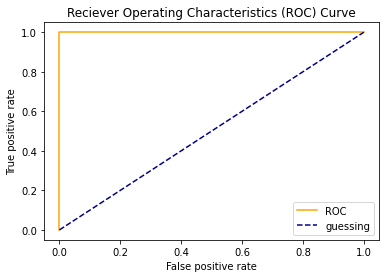

In [102]:
# Plot the perfect ROC curve and AUC score
fpr,tpr,tresholds = roc_curve(y_test,y_test)
plot_ROC_curve(fpr,tpr)

In [103]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

### Confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actaul labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused

In [104]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[21,  5],
       [ 8, 27]])

In [105]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predict_Label"])

Predict_Label,0,1
Actual Label,,
0,21,5
1,8,27


In [109]:
# Install conda package from jupyter notebook
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

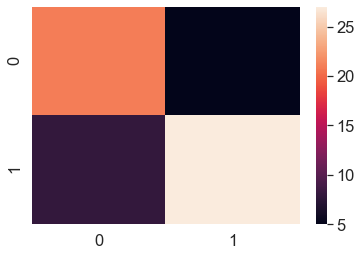

In [110]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

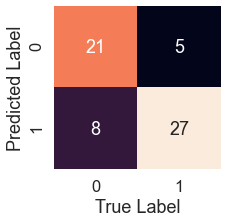

In [111]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot=True,cbar=False) # annot: Annotate the box with the conf_mat info
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

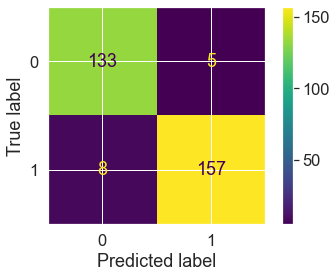

In [112]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,y);

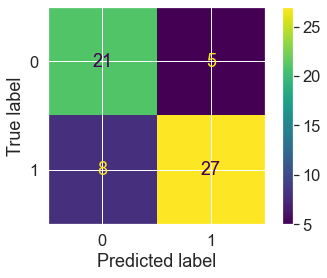

In [113]:
plot_confusion_matrix(clf,X_test,y_test);

### Classification report

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [115]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1  # Only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/Users/wine/Desktop/Learn/sample/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* `Precision` - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* `Recall` - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* `F1 score` - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* `Support` - The number of samples each metric was calculated on.
* `Accuracy` - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* `Macro avg` - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* `Weighted avg` - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

### 4.2.2 Regression model evaluation metrics

1. R^2 (R-Square) or coefficient of determination.
2. Mean Absolut Error (MAE)
3. Mean Sqaure Error (MSE)

**R^2**

What R^2 does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [116]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [117]:
model.score(X_test,y_test)

0.8654448653350507

In [118]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [119]:
y_test.mean()

21.488235294117644

In [120]:
r2_score(y_test,y_test_mean)

0.0

In [121]:
r2_score(y_test,y_test)

1.0

**Mean Absolute Error (MAE)**

The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

In [122]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [123]:
df = pd.DataFrame(data={"actual values": y_test,"predicted values":y_preds})
df["difference"] = df["actual values"]-df["predicted values"]
abs(df["difference"]).mean()

2.136382352941176

**Mean Square Error (MSE)**

The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [124]:
# Mean Sqaure Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [125]:
df["square_diff"]=np.square(df["difference"])
df

,actual values,predicted values,difference,square_diff
173,23.6,23.081,0.519,0.269361
274,32.4,30.574,1.826,3.334276
491,13.6,16.759,-3.159,9.979281
72,22.8,23.460,-0.660,0.435600
452,16.1,16.893,-0.793,0.628849
...,...,...,...,...
412,17.9,13.159,4.741,22.477081
436,9.6,12.476,-2.876,8.271376
411,17.2,13.612,3.588,12.873744
86,22.5,20.205,2.295,5.267025


In [126]:
df["square_diff"].mean()

9.867437068627442

### 4.2.3 Using `scoring` parameters

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,y_train);

In [128]:
model.score(X_test,y_test)

0.8524590163934426

In [129]:
np.random.seed(42)
cvs_acc = cross_val_score(model,X,y,cv=5)
print(f"The cross validiation accuracy: {np.mean(cvs_acc)*100:.2f}%")

The cross validiation accuracy: 82.48%


In [130]:
np.random.seed(42)
cvs_acc = cross_val_score(model,X,y,cv=5,scoring="accuracy")
print(f"The cross validiation accuracy: {np.mean(cvs_acc)*100:.2f}%")

The cross validiation accuracy: 82.48%


In [131]:
np.random.seed(42)
cvs_pcs = cross_val_score(model,X,y,cv=5,scoring="precision")
print(f"The cross validiation precision: {np.mean(cvs_pcs)*100:.2f}%")

The cross validiation precision: 83.30%


In [132]:
np.random.seed(42)
cvs_rc = cross_val_score(model,X,y,cv=5,scoring="recall")
print(f"The cross validiation recall: {np.mean(cvs_rc)*100:.2f}%")

The cross validiation recall: 85.45%


In [133]:
np.random.seed(42)
cvs_f1 = cross_val_score(model,X,y,cv=5,scoring="f1")
print(f"The cross validiation f1: {np.mean(cvs_f1)*100:.2f}%")

The cross validiation f1: 84.27%


How about our regression model?

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

In [135]:
model.score(X_test,y_test)

0.8654448653350507

In [136]:
np.random.seed(42)
cvs_r2 = cross_val_score(model,X,y,cv=5,scoring=None)
print(f"The cross validiation r2: {np.mean(cvs_r2)*100:.2f}%")

The cross validiation r2: 62.44%


In [137]:
np.random.seed(42)
cvs_r2 = cross_val_score(model,X,y,cv=5,scoring="r2")
print(f"The cross validiation r2: {np.mean(cvs_r2)*100:.2f}%")

The cross validiation r2: 62.44%


In [138]:
np.random.seed(42)
cvs_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
print(f"The cross validiation Mean Absolute Square: {np.mean(cvs_mae):.2f}")

The cross validiation Mean Absolute Square: -3.03


In [139]:
np.random.seed(42)
cvs_mse = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
print(f"The cross validiation Mean Sqaured Square: {np.mean(cvs_mse):.2f}")

The cross validiation Mean Sqaured Square: -21.26


### 4.3 Using different avaluation metrics as Scikit-Learn functions

**Classification Evaluation functions**

In [140]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,y_train);

# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the classifier
print("Classifier on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")

Classifier on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression Evaluation functions**

In [141]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train);

# Make some predictions
y_preds = model.predict(X_test)

# Evaluate the regressor
print("Regressor model metrics on the test set")
print(f"R2: {r2_score(y_test,y_preds)*100:.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_preds):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_preds):.2f}")

Regressor model metrics on the test set
R2: 86.54%
Mean Absolute Error: 2.14
Mean Squared Error: 9.87


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:

    * Could we collect more data? (generally, the more data, the better)
    * Could we improve our data?
    
From a model perspective:

    * Is there a better model we could use?
    * Could we improve the current model?

    
Parameters VS Huperparameters:

    * Parameters = model find these pattern in the data
    * Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns
    
Three ways to adjust Hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning Hyperparameters by Hand

Let's make 3 sets, training, validation and test

In [143]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [144]:
def evaluate_preds(y_true,y_preds):
    """
    Perform evaluation comparison on y_true labels vs. y_preds labels on a classification model.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metrics_dict = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2),
    }
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metrics_dict

In [145]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1 )
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test set
train_split = round(0.7*len(heart_disease_shuffled)) # 70%
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15%
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [146]:
model = RandomForestClassifier()

In [147]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
model.fit(X_train,y_train);

In [149]:
# Make baseline predictions
y_preds = model.predict(X_valid)

In [150]:
# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


In [151]:
np.random.seed(42)

# Create a second classifier with different parameters
model_2 = RandomForestClassifier(n_estimators = 100)
model_2.fit(X_train,y_train)

# Make baseline predictions
y_preds_2 = model_2.predict(X_valid)

In [152]:
# Evaluate the classifier on validation set
baseline_metrics_2 = evaluate_preds(y_valid,y_preds_2)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


In [153]:
np.random.seed(42)

# Create a second classifier with different parameters
model_3 = RandomForestClassifier(n_estimators = 100,max_depth=100)
model_3.fit(X_train,y_train)

# Make baseline predictions
y_preds_3 = model_3.predict(X_valid)

In [154]:
# Evaluate the classifier on validation set
baseline_metrics_3 = evaluate_preds(y_valid,y_preds_3)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


### 5.2 Tunning Hyperparameters with RandomizedSearchCV

In [155]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X and y
heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train, validation and test set
# train_split = round(0.7*len(heart_disease_shuffled))
# valid_split = round(train_split + 0.15*len(heart_disease_shuffled))
# X_train,y_train = X[:train_split],y[:train_split]
# X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
# X_test,y_test = X[valid_split:],y[valid_split:]

# Split into train, test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate the model
model = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                              param_distributions=grid,
                              n_iter=10,  # n_iters: number of model to try
                              cv=5,
                              verbose=2)

# Fit the RandomizedSearchCV
rs_model.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_lea

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   33.1s finished


In [156]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [157]:
# Make prediction with the best Hyperparameters
rs_y_preds = rs_model.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 83.61%
Precision: 0.87
Recall: 0.82
F1: 0.84


### 5.3 Tunning Hyperparameters with GridSearchCV

In [158]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [159]:
grid_2 = {"n_estimators":[100,200,500],
       "max_depth":[20],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4],
       "min_samples_leaf":[4]}

In [160]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_jobs=1)

gs_model = GridSearchCV(estimator=model,
                       param_grid=grid_2,
                       cv=5,
                       verbose=2)

gs_model.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.9s finished


In [161]:
gs_model.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [162]:
gs_y_preds = gs_model.predict(X_test)

In [163]:
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.82
F1: 0.83


Let's compare our different models metrics.

In [164]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,"baseline_2":baseline_metrics_2,
                                "random search": rs_metrics,"grid search": gs_metrics })

compare_metrics

,baseline,baseline_2,random search,grid search
accuracy,0.82,0.82,0.84,0.82
precision,0.81,0.84,0.87,0.84
recall,0.88,0.84,0.82,0.82
f1,0.85,0.84,0.84,0.83


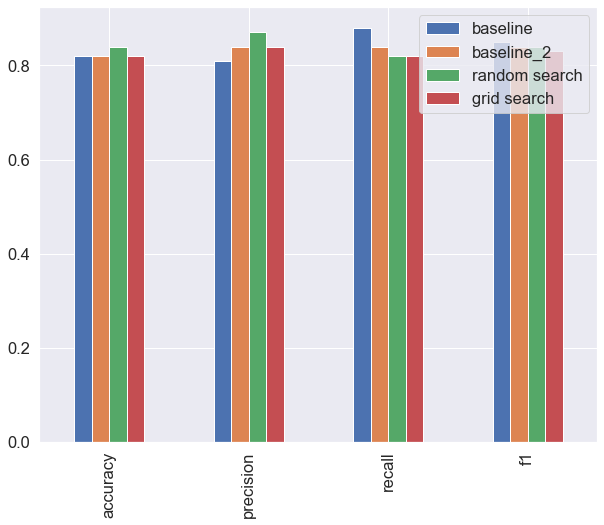

In [165]:
compare_metrics.plot.bar(figsize=(10,8))
plt.show()

### 6. Saving and Loading the trained machine learning models

**Pickle**

In [166]:
import pickle

# Save an existing model to file
pickle.dump(gs_model,open("Outputs/gs_random_forest_model.pkl","wb"))

In [167]:
# Load a saved model
loaded_pickle_model = pickle.load(open("Outputs/gs_random_forest_model.pkl","rb"))

In [168]:
# Make some predictions
y_preds_loaded = loaded_pickle_model.predict(X_test) 
evaluate_preds(y_test,y_preds_loaded)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.82
F1: 0.83


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.82, 'f1': 0.83}

**Joblib**

In [169]:
from joblib import dump,load

# Save an existing model to file
dump(rs_model,filename="Outputs/rs_random_forest_model.joblib")

['Outputs/rs_random_forest_model.joblib']

In [170]:
# Load a saved model
loaded_joblib_model = load(filename="Outputs/rs_random_forest_model.joblib")

In [171]:
# Make some predictions
y_preds_loaded = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,y_preds_loaded)

Accuracy: 83.61%
Precision: 0.87
Recall: 0.82
F1: 0.84


{'accuracy': 0.84, 'precision': 0.87, 'recall': 0.82, 'f1': 0.84}

## 7. Putting it all together

In [172]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [173]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [174]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

    1. Fill missing data
    2. Convert to numerical
    3. Build a model

In [175]:
# Get the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drops rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv").dropna(subset=["Price"])

# Define different features and transform pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values then convert to numerical)
preprocessor = ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transformer,numeric_features)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor())
])

# Split data
X = data.drop("Price",axis=1)
y = data["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [176]:
# Use `GridSearchCV` with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [177]:
gs_model.score(X_test,y_test)

0.3339554263158365